# Multivariate imputation

The truth is, none of the datasets that I used in the assignments contained missing data. So I introduced some at random. That allows us to practice imputation methods. And also makes the conclusions more boring.

But, anyhow, let's take the opportunity to try and infer the values of the missing data that I introduced using multivariate imputation.

We will use the Taiwan bankruptcy dataset.

The data was introduced in the following article: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254030

And it can be downloaded from Kaggle: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction.

I processed the data and uploaded it to the repo for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data = pd.read_csv("../taiwan_na.csv")

data.head()

,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,NaN,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("bankrupt", axis=1),
    data["bankrupt"],
    test_size=0.33,
    random_state=42,
)

# Find variables with nan

In [4]:
vars_nan = [var for var in X_train.columns if X_train[var].isnull().any()]

vars_nan

['Pre-tax net Interest Rate',
 'Persistent EPS in the Last Four Seasons',
 'Net Value Growth Rate',
 'Cash Reinvestment %',
 'Contingent liabilities/Net worth',
 'Net profit before tax/Paid-in capital',
 'Inventory/Current Liability',
 'Total expense/Assets',
 'Interest Coverage Ratio (Interest expense to EBIT)']

# Imputation

## Set up the imputers

Carry out multivariate imputation using various regressors of your choosing.

In [5]:
# I use max_iter = 5 to speed things up
# I also set the imputer to ignore variables with no NA

imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=5,
    random_state=0,
    skip_complete=True,
).set_output(transform="pandas")

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=5,
    random_state=0,
    skip_complete=True,
).set_output(transform="pandas")

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=5,
    random_state=0,
    skip_complete=True,
).set_output(transform="pandas")

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=5, random_state=0),
    max_iter=5,
    random_state=0,
    skip_complete=True,
).set_output(transform="pandas")

## Fit the imputers

In [6]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=5, random_state=0),
                 max_iter=5, random_state=0, skip_complete=True)

## Transform the datasets

In [7]:
# replace NA

X_test_bayes = imputer_bayes.transform(X_test)
X_test_knn = imputer_knn.transform(X_test)
X_test_nonLin = imputer_nonLin.transform(X_test)
X_test_missForest = imputer_missForest.transform(X_test)

# Plot the distributions of the variables with nan after the various imputations

I'll do one variable as example, you can go ahead and inspect the rest ;)

In [8]:
vars_nan

['Pre-tax net Interest Rate',
 'Persistent EPS in the Last Four Seasons',
 'Net Value Growth Rate',
 'Cash Reinvestment %',
 'Contingent liabilities/Net worth',
 'Net profit before tax/Paid-in capital',
 'Inventory/Current Liability',
 'Total expense/Assets',
 'Interest Coverage Ratio (Interest expense to EBIT)']

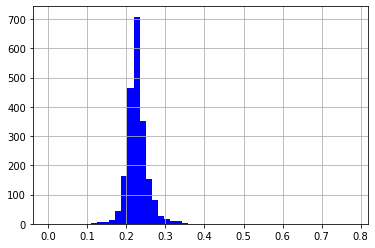

In [9]:
X_test['Persistent EPS in the Last Four Seasons'].hist(bins=50, color='blue')
plt.show()

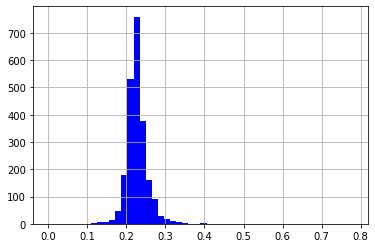

In [10]:
X_test_bayes['Persistent EPS in the Last Four Seasons'].hist(bins=50, color='blue')
plt.show()

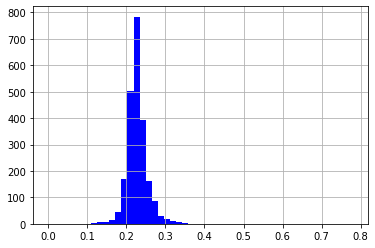

In [11]:
X_test_knn['Persistent EPS in the Last Four Seasons'].hist(bins=50, color='blue')
plt.show()

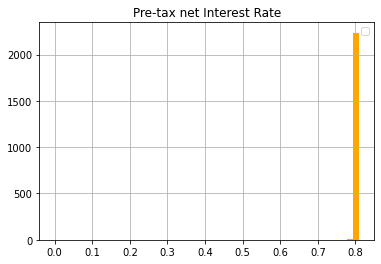

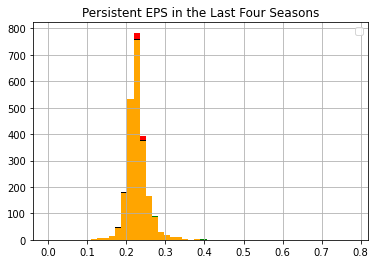

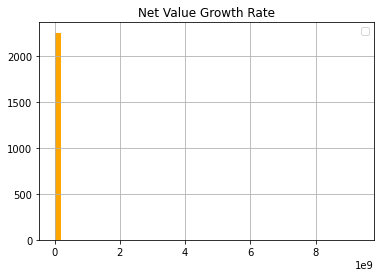

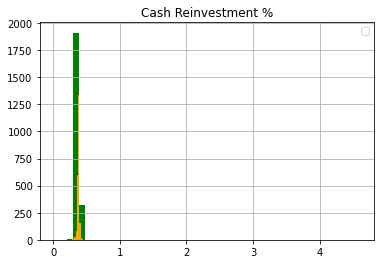

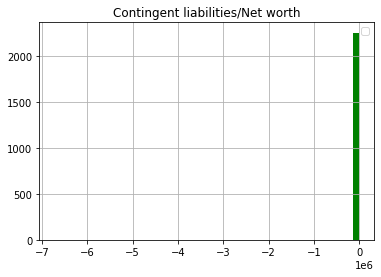

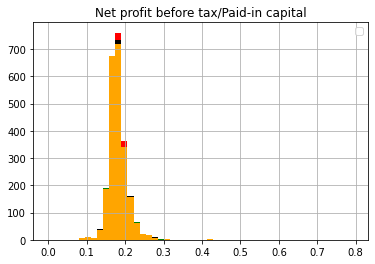

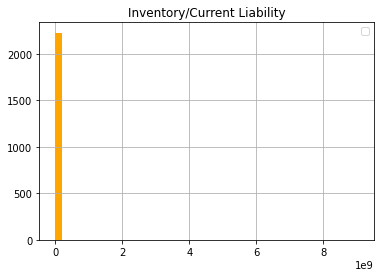

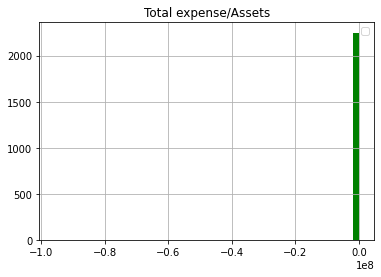

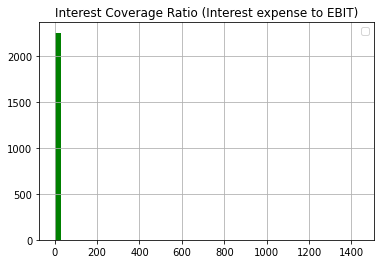

In [12]:
for var in vars_nan:
   
    fig = plt.figure()
    ax = fig.add_subplot(111)

    X_test[var].hist(bins=50, color='blue')
    X_test_bayes[var].hist(bins=50, color='green')
    X_test_knn[var].hist(bins=50, color='red')
    X_test_nonLin[var].hist(bins=50, color='black')
    X_test_missForest[var].hist(bins=50, color='orange')

    # add legends
    lines, labels = ax.get_legend_handles_labels()
    labels = ['original', 'bayes', 'knn', 'Trees', 'missForest']
    ax.legend(lines, labels, loc='best')
    plt.title(var)
    plt.show()